In [86]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib import colors

plt.rcParams.update({'font.size': 16})

In [9]:
input_dim = 1
output_dim = 1

A = 2 * np.random.rand(output_dim, input_dim) - 1
b = 2 * np.random.rand(output_dim) - 1

true_model = lambda x: A @ x + b

In [10]:
n_train = 1000
noise_level = 0.04

X_train = np.random.rand(n_train, input_dim)
y_train = np.array([true_model(x) for x in X_train])

# add noise
y_train += noise_level * np.random.standard_normal(size=y_train.shape)

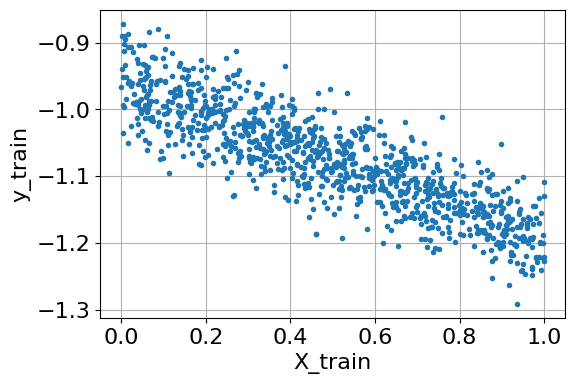

In [17]:
if input_dim == output_dim == 1:
    fig = plt.figure(figsize=(6, 4))
    fig.clf()
    ax = fig.gca()
    ax.plot(X_train, y_train, '.')
    ax.grid()
    ax.set_xlabel('X_train')
    ax.set_ylabel('y_train')

In [47]:
class VectorialDataset(Dataset):
    def __init__(self, input_data, output_data):
        super(VectorialDataset, self).__init__()
        self.input_data = torch.tensor(input_data.astype('f'))
        self.output_data = torch.tensor(output_data.astype('f'))
    
    def __len__(self):
        return self.input_data.shape[0]
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        sample = (self.input_data[idx, :], self.output_data[idx, :])
        return sample


In [51]:
training_set = VectorialDataset(X_train, y_train)
training_set[10:12]

(tensor([[0.6870],
         [0.8387]]),
 tensor([[-1.0767],
         [-1.1754]]))

In [81]:
batch_size = 120
train_loader = DataLoader(training_set, batch_size=batch_size, shuffle=True)

In [82]:
for idx, batch in enumerate(train_loader):
    print(f"batch: {idx}, input: {batch[0].shape}, output: {batch[1].shape}")

batch: 0, input: torch.Size([120, 1]), output: torch.Size([120, 1])
batch: 1, input: torch.Size([120, 1]), output: torch.Size([120, 1])
batch: 2, input: torch.Size([120, 1]), output: torch.Size([120, 1])
batch: 3, input: torch.Size([120, 1]), output: torch.Size([120, 1])
batch: 4, input: torch.Size([120, 1]), output: torch.Size([120, 1])
batch: 5, input: torch.Size([120, 1]), output: torch.Size([120, 1])
batch: 6, input: torch.Size([120, 1]), output: torch.Size([120, 1])
batch: 7, input: torch.Size([120, 1]), output: torch.Size([120, 1])
batch: 8, input: torch.Size([40, 1]), output: torch.Size([40, 1])


In [83]:
first_batch = []

for epoch in range(2):
    for idx, batch in enumerate(train_loader):
        if idx == 0:
            first_batch.append(batch)


In [85]:
np.c_[X_train[:batch_size], first_batch[0][0].numpy(), first_batch[1][0].numpy()]

array([[0.44081424, 0.25193775, 0.38332945],
       [0.11333398, 0.50823992, 0.33753347],
       [0.52144735, 0.9271    , 0.98669738],
       [0.48012068, 0.37674588, 0.2400928 ],
       [0.88420879, 0.56425339, 0.1617835 ],
       [0.04410744, 0.93577415, 0.73605835],
       [0.55525756, 0.34737524, 0.87079257],
       [0.38145114, 0.15276425, 0.05681371],
       [0.6243937 , 0.18850103, 0.26837388],
       [0.15700163, 0.35670108, 0.62032235],
       [0.68698983, 0.87283456, 0.25613493],
       [0.83871681, 0.82154965, 0.3992013 ],
       [0.01548247, 0.66004938, 0.24969541],
       [0.66273489, 0.63842821, 0.82154965],
       [0.13926921, 0.165442  , 0.4382486 ],
       [0.64163647, 0.75197738, 0.05831725],
       [0.03288735, 0.46444756, 0.51383233],
       [0.63842823, 0.37469852, 0.91352999],
       [0.53798712, 0.65388781, 0.6144194 ],
       [0.48010247, 0.01796713, 0.23846507],
       [0.13194864, 0.4932856 , 0.18850103],
       [0.44577098, 0.39149463, 0.6173622 ],
       [0.

In [88]:
class LinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.linear = nn.Linear(input_dim, output_dim, bias=True)
    
    def forward(self, x):
        return self.linear(x)
    
    def reset(self):
        self.linear.reset_parameters()

In [90]:
model = LinearModel(input_dim, output_dim)

In [95]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.5719]], requires_grad=True),
 Parameter containing:
 tensor([-0.7548], requires_grad=True)]

In [106]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[-0.5719]], requires_grad=True)
Parameter containing:
tensor([-0.7548], requires_grad=True)


In [103]:
x = torch.rand(5, input_dim)
model.forward(x)

tensor([[-0.7848],
        [-0.8336],
        [-0.8040],
        [-1.1257],
        [-0.8956]], grad_fn=<AddmmBackward0>)

In [107]:
[model.linear.weight @ xx + model.linear.bias for xx in x]

[tensor([-0.7848], grad_fn=<AddBackward0>),
 tensor([-0.8336], grad_fn=<AddBackward0>),
 tensor([-0.8040], grad_fn=<AddBackward0>),
 tensor([-1.1257], grad_fn=<AddBackward0>),
 tensor([-0.8956], grad_fn=<AddBackward0>)]

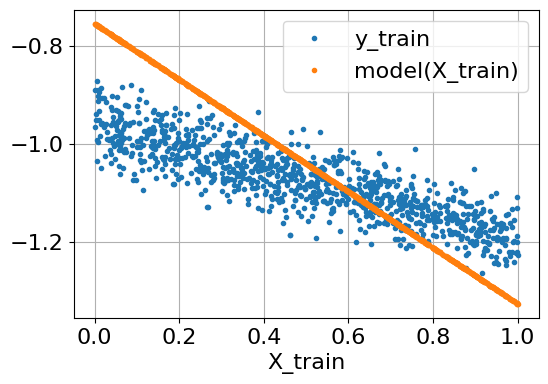

In [125]:
if input_dim == output_dim == 1:
    fig = plt.figure(figsize=(6, 4))
    fig.clf()
    ax = fig.gca()
    ax.plot(training_set.input_data, training_set.output_data, '.')
    ax.plot(training_set.input_data, model.forward(training_set.input_data).detach(), '.')
    ax.grid()
    ax.set_xlabel('X_train')
    ax.legend(['y_train', 'model(X_train)'])

In [131]:
loss_fun = nn.MSELoss(reduction='mean')

x = torch.tensor(np.array([1, 2, 1]).astype('f'))
z = torch.tensor(np.array([0, 0, 0]).astype('f'))
loss_fun(x, z)

tensor(2.)

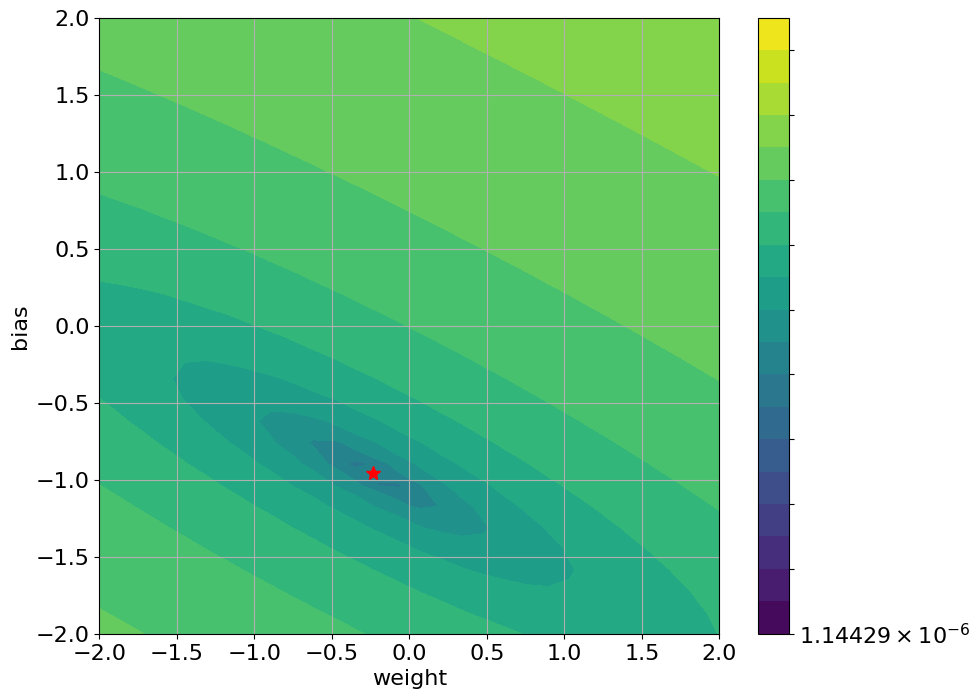

In [141]:
if input_dim == output_dim == 1:
    state_dict = model.state_dict()
    ww, bb = np.meshgrid(np.linspace(-2, 2, 30), np.linspace(-2, 2, 30))

    loss_values = 0 * ww
    for i in range(ww.shape[0]):
        for j in range(ww.shape[1]):
            state_dict['linear.weight'] = torch.tensor([[ww[i, j]]])
            state_dict['linear.bias'] = torch.tensor([bb[i, j]])
            model.load_state_dict(state_dict)
            loss_values[i, j] = loss_fun(model.forward(training_set.input_data), training_set.output_data)
    
    fig = plt.figure(figsize=(10, 8))
    fig.clf()
    ax = fig.gca()
    levels = np.logspace(np.log(np.min(loss_values)), np.log(np.max(loss_values)), 20)
    c = ax.contourf(ww, bb, loss_values, levels=levels, norm=colors.LogNorm())
    plt.colorbar(c)
    ax.plot(A[0], b, 'r*', markersize=10)
    ax.set_xlabel('weight')
    ax.set_ylabel('bias')
    # ax.legend(['(A, b)'])
    ax.grid()

In [154]:
x = torch.rand(1, input_dim)
y = torch.rand(1, output_dim)

model.zero_grad()
loss = loss_fun(model.forward(x), y)
loss.backward()

if input_dim == output_dim == 1:
    print(model.linear.weight.grad)
    print(2 * x * (model.linear.weight * x + model.linear.bias - y))

    print(model.linear.bias.grad)
    print(2 * (model.linear.weight * x + model.linear.bias - y))

tensor([[2.6330]])
tensor([[2.6330]], grad_fn=<MulBackward0>)
tensor([5.2122])
tensor([[5.2122]], grad_fn=<MulBackward0>)


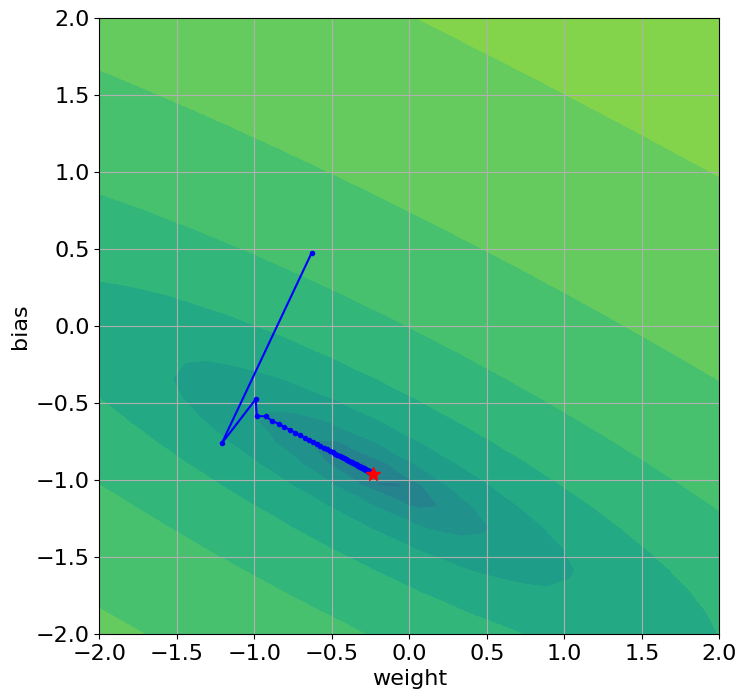

In [157]:
if input_dim == output_dim == 1:
    num_iter = 200
    lr = 0.5

    train_hist = {}
    train_hist['weight'] = []
    train_hist['bias'] = []

    model.reset()
    state_dict = model.state_dict()

    for _ in range(num_iter):
        model.zero_grad()
        loss = loss_fun(model.forward(training_set.input_data), training_set.output_data)
        # w, bを更新するために、勾配を計算。結果はmodelに格納される
        loss.backward()

        w = model.linear.weight.item()
        b = model.linear.bias.item()

        dw = model.linear.weight.grad.item()
        db = model.linear.bias.grad.item()

        # w, bを更新
        state_dict['linear.weight'] += torch.tensor([-lr * dw])
        state_dict['linear.bias'] += torch.tensor([-lr * db])
        model.load_state_dict(state_dict)

        train_hist['weight'].append(w)
        train_hist['bias'].append(b)
    
    for label in train_hist:
        train_hist[label] = np.array(train_hist[label])

    fig = plt.figure(figsize=(8, 8))
    fig.clf()
    ax = fig.gca()
    levels = np.logspace(np.log(np.min(loss_values)), np.log(np.max(loss_values)), 20)
    ax.contourf(ww, bb, loss_values, levels=levels, norm=colors.LogNorm())
    ax.set_xlabel('weight')
    ax.set_ylabel('bias')
    ax.grid()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

    ax.plot(train_hist['weight'], train_hist['bias'], '.-b')
    ax.plot(A[0], b, 'r*', markersize=10)

    # ax.legend(['optim', '(A, b)'])

In [179]:
lr = 0.1
weight_decay = 5e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

n_epochs = 100
train_hist = {}
train_hist['loss'] = []

if input_dim == output_dim == 1:
    train_hist['weight'] = []
    train_hist['bias'] = []

model.reset()
model.train()

for epoch in range(n_epochs):
    # train_loaderは`shuffle=True`なので、毎epochごとにデータがシャッフルされる
    for idx, batch in enumerate(train_loader):
        optimizer.zero_grad()
        loss = loss_fun(model.forward(batch[0]), batch[1])
        loss.backward()
        # w, bの更新
        optimizer.step()

        # 出力用にデータを保存
        train_hist['loss'].append(loss.item())
        if input_dim == output_dim == 1:
            train_hist['weight'].append(model.linear.weight.item())
            train_hist['bias'].append(model.linear.bias.item())
        
        print(f'epoch: {epoch+1}/{n_epochs}, batch: {idx+1}/{len(train_loader)}, loss: {loss.item()}')

model.eval()

epoch: 1/100, batch: 1/9, loss: 2.7383830547332764
epoch: 1/100, batch: 2/9, loss: 2.445033550262451
epoch: 1/100, batch: 3/9, loss: 1.8729277849197388
epoch: 1/100, batch: 4/9, loss: 1.5146280527114868
epoch: 1/100, batch: 5/9, loss: 1.1388813257217407
epoch: 1/100, batch: 6/9, loss: 0.8284404277801514
epoch: 1/100, batch: 7/9, loss: 0.5794711709022522
epoch: 1/100, batch: 8/9, loss: 0.39126279950141907
epoch: 1/100, batch: 9/9, loss: 0.2570383548736572
epoch: 2/100, batch: 1/9, loss: 0.14096103608608246
epoch: 2/100, batch: 2/9, loss: 0.0604822039604187
epoch: 2/100, batch: 3/9, loss: 0.020859772339463234
epoch: 2/100, batch: 4/9, loss: 0.0026065348647534847
epoch: 2/100, batch: 5/9, loss: 0.005223572254180908
epoch: 2/100, batch: 6/9, loss: 0.02579113468527794
epoch: 2/100, batch: 7/9, loss: 0.05681668967008591
epoch: 2/100, batch: 8/9, loss: 0.08507377654314041
epoch: 2/100, batch: 9/9, loss: 0.1148931011557579
epoch: 3/100, batch: 1/9, loss: 0.13254408538341522
epoch: 3/100, batch

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

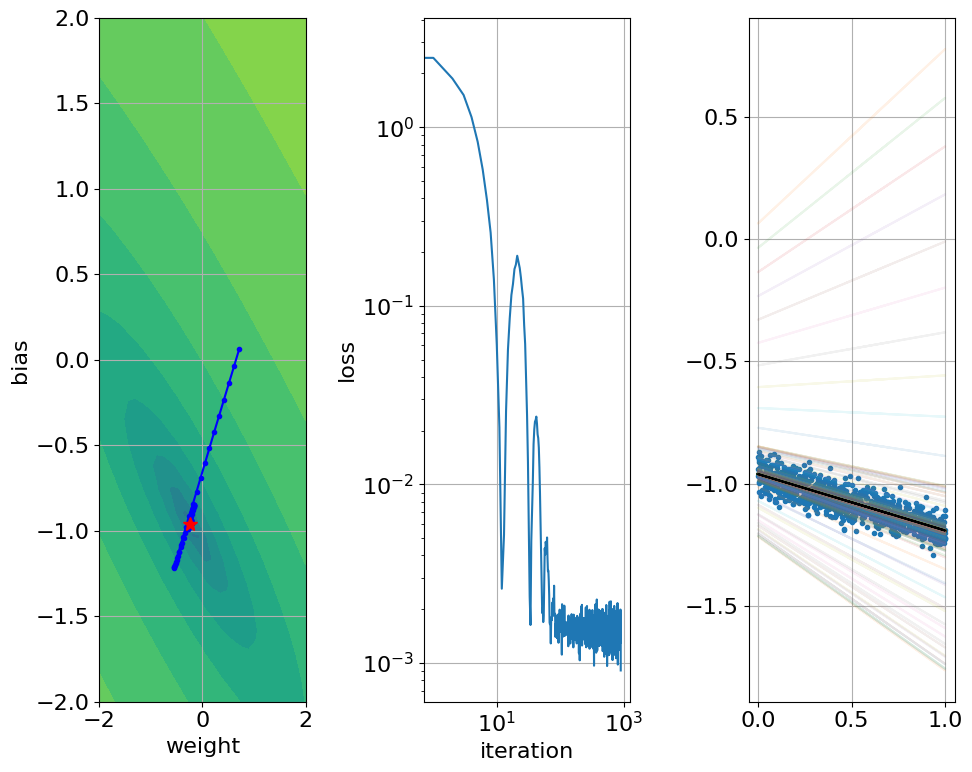

In [187]:
if input_dim == output_dim == 1:
    n_test = 500
    X_test = np.random.rand(n_test, input_dim)
    y_pred = []

    state_dict = model.state_dict()

    for idx in range(len(train_hist['weight'])):
        state_dict['linear.weight'] = torch.tensor([[train_hist['weight'][idx]]])
        state_dict['linear.bias'] = torch.tensor([train_hist['bias'][idx]])
        model.load_state_dict(state_dict)

        y_pred.append(model.forward(torch.tensor(X_test.astype('f'))).detach().numpy())

    fig = plt.figure(figsize=(10, 8))
    fig.clf()
    ax = plt.subplot(1, 3, 1)
    levels = np.logspace(np.log(np.min(loss_values)), np.log(np.max(loss_values)), 20)
    ax.contourf(ww, bb, loss_values, levels=levels, norm=colors.LogNorm())
    ax.plot(train_hist['weight'], train_hist['bias'], '.-b')
    ax.plot(A[0], b, 'r*', markersize=10)
    ax.set_xlabel('weight')
    ax.set_ylabel('bias')
    # ax.legend(['optim', '(A, b)'])
    ax.grid()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

    ax = fig.add_subplot(1, 3, 2)
    ax.loglog(np.abs(train_hist['loss']))
    ax.set_xlabel('iteration')
    ax.set_ylabel('loss')
    ax.grid()

    ax = fig.add_subplot(1, 3, 3)
    ax.plot(X_train, y_train, '.')
    ax.plot(X_test, y_pred[0], '-', alpha=0.1)
    for y in y_pred[1:]:
        ax.plot(X_test, y, '-', alpha=0.1)
    ax.plot(X_test, y_pred[-1], 'k')
    ax.grid()

    fig.tight_layout()